# MechanicsKit `fplot()` Function Examples

This notebook demonstrates the `fplot()` function for plotting symbolic functions, similar to MATLAB's fplot.

## Overview

The `fplot()` function:
- Automatically detects the parameter from symbolic expressions
- Supports both regular 2D plots and parametric curves
- Uses default range of [-5, 5] (can be customized)
- Works seamlessly with SymPy symbolic expressions

**Key advantage**: You don't need to manually create arrays and evaluate functions - just pass the symbolic expression!

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mechanicskit import fplot

%matplotlib inline

## Basic Examples

### Example 1: Simple Function with Auto-Detection

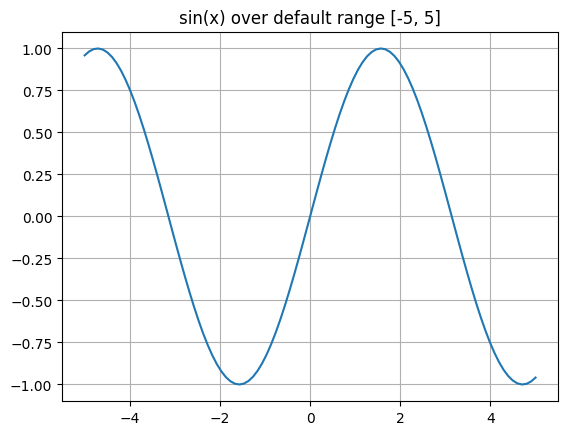

In [2]:
# Define symbolic variable
x = sp.Symbol('x')

# Plot sin(x) - automatically detects x as the parameter
fplot(sp.sin(x))
plt.title('sin(x) over default range [-5, 5]')
plt.grid(True)
plt.show()

### Example 2: Custom Range

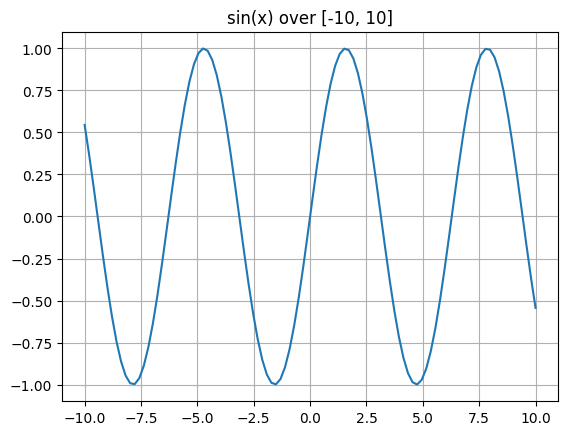

In [3]:
# Plot over custom range
fplot(sp.sin(x), range=(-10, 10))
plt.title('sin(x) over [-10, 10]')
plt.grid(True)
plt.show()

### Example 3: Multiple Plots on Same Axes

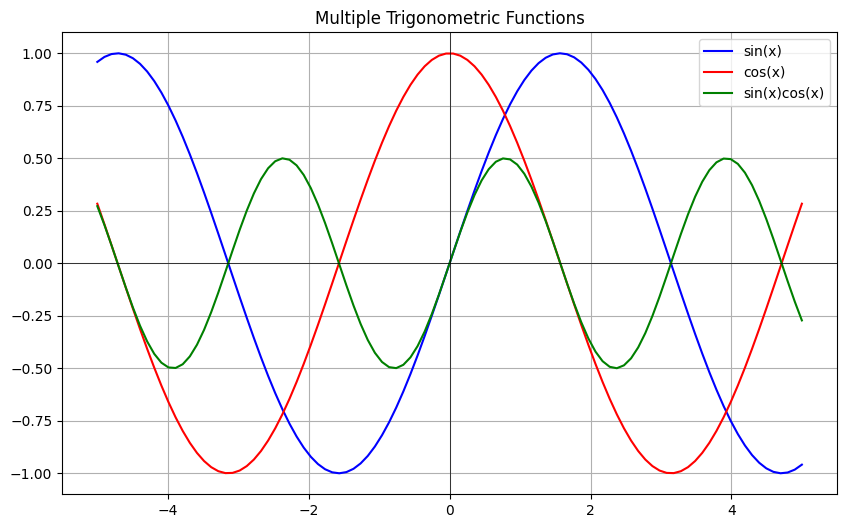

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot multiple functions
fplot(sp.sin(x), ax=ax, color='blue', label='sin(x)')
fplot(sp.cos(x), ax=ax, color='red', label='cos(x)')
fplot(sp.sin(x) * sp.cos(x), ax=ax, color='green', label='sin(x)cos(x)')

ax.set_title('Multiple Trigonometric Functions')
ax.legend()
ax.grid(True)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
plt.show()

### Example 4: Styling with kwargs

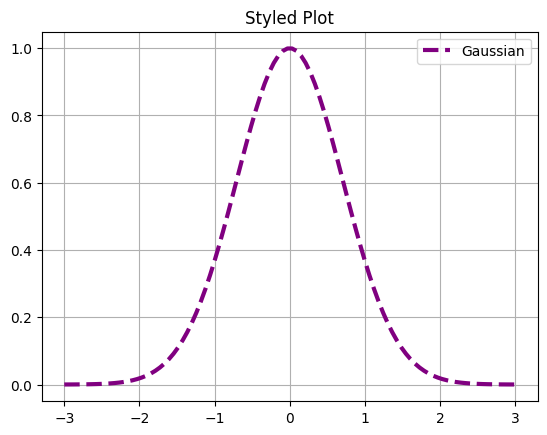

In [5]:
# Custom styling
fplot(sp.exp(-x**2), range=(-3, 3),
      color='purple', linewidth=3, linestyle='--', label='Gaussian')
plt.title('Styled Plot')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial and Rational Functions

### Example 5: Polynomial

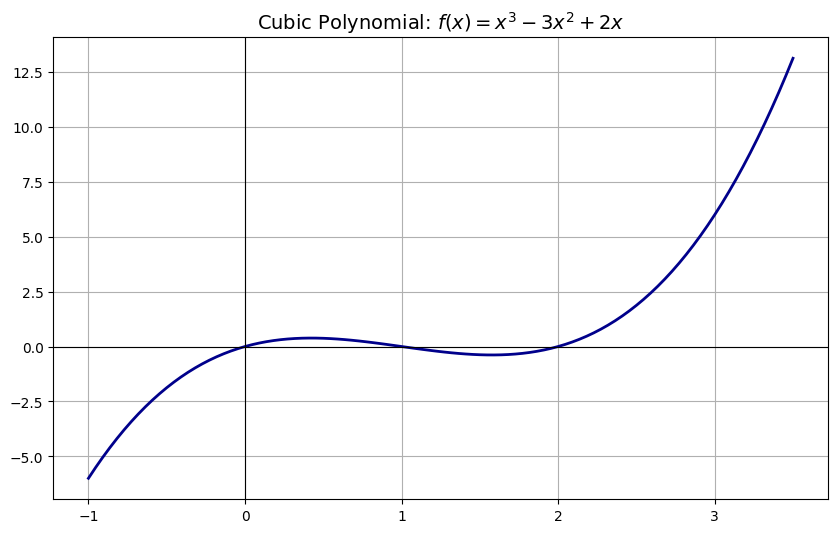

In [6]:
# Cubic polynomial
f = x**3 - 3*x**2 + 2*x

fig, ax = plt.subplots(figsize=(10, 6))
fplot(f, range=(-1, 3.5), ax=ax, color='darkblue', linewidth=2)
ax.set_title('Cubic Polynomial: $f(x) = x^3 - 3x^2 + 2x$', fontsize=14)
ax.grid(True)
ax.axhline(y=0, color='k', linewidth=0.8)
ax.axvline(x=0, color='k', linewidth=0.8)
plt.show()

### Example 6: Rational Function

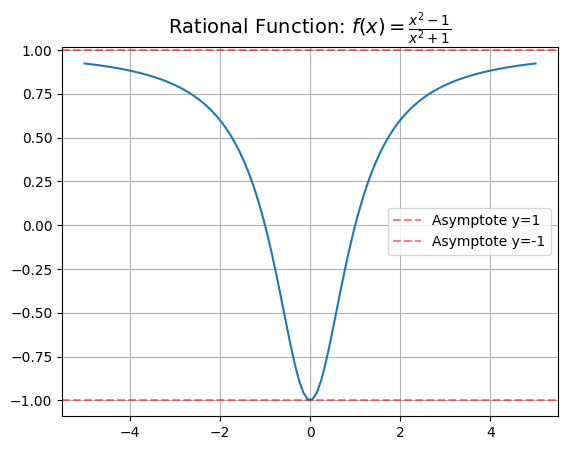

In [7]:
# Rational function
f = (x**2 - 1) / (x**2 + 1)

fplot(f, range=(-5, 5))
plt.title('Rational Function: $f(x) = \\frac{x^2-1}{x^2+1}$', fontsize=14)
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Asymptote y=1')
plt.axhline(y=-1, color='r', linestyle='--', alpha=0.5, label='Asymptote y=-1')
plt.legend()
plt.show()

## Exponential and Logarithmic Functions

### Example 7: Exponential Growth and Decay

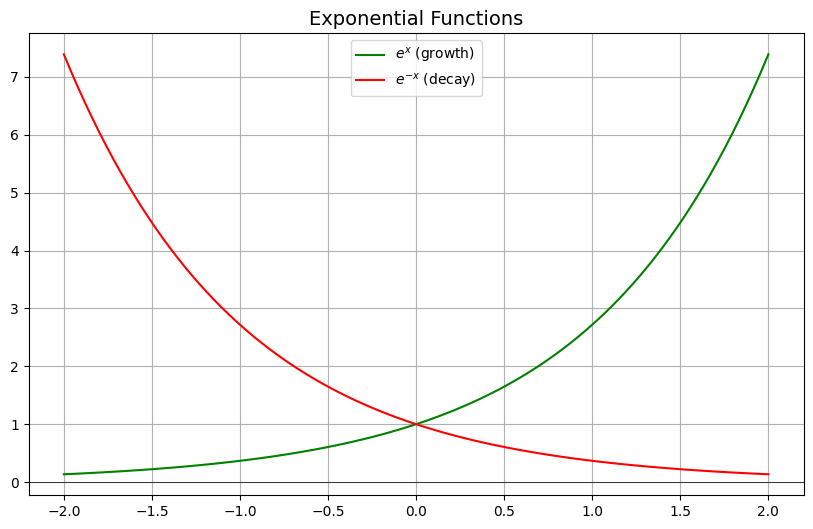

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

fplot(sp.exp(x), range=(-2, 2), ax=ax, label='$e^x$ (growth)', color='green')
fplot(sp.exp(-x), range=(-2, 2), ax=ax, label='$e^{-x}$ (decay)', color='red')

ax.set_title('Exponential Functions', fontsize=14)
ax.legend()
ax.grid(True)
ax.axhline(y=0, color='k', linewidth=0.5)
plt.show()

### Example 8: Gaussian Function

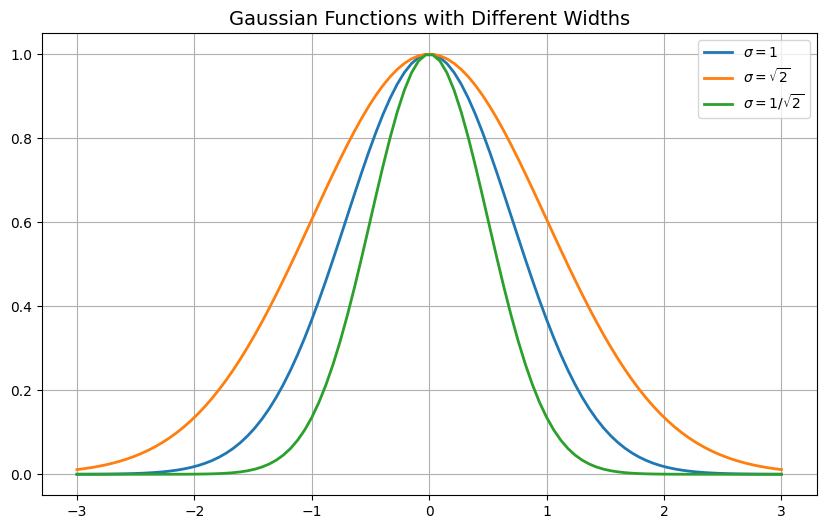

In [9]:
# Gaussian with different parameters
fig, ax = plt.subplots(figsize=(10, 6))

fplot(sp.exp(-x**2), range=(-3, 3), ax=ax, label='$\\sigma=1$', linewidth=2)
fplot(sp.exp(-x**2/2), range=(-3, 3), ax=ax, label='$\\sigma=\\sqrt{2}$', linewidth=2)
fplot(sp.exp(-2*x**2), range=(-3, 3), ax=ax, label='$\\sigma=1/\\sqrt{2}$', linewidth=2)

ax.set_title('Gaussian Functions with Different Widths', fontsize=14)
ax.legend()
ax.grid(True)
plt.show()

## Parametric Curves

### Example 9: Circle (Parametric)

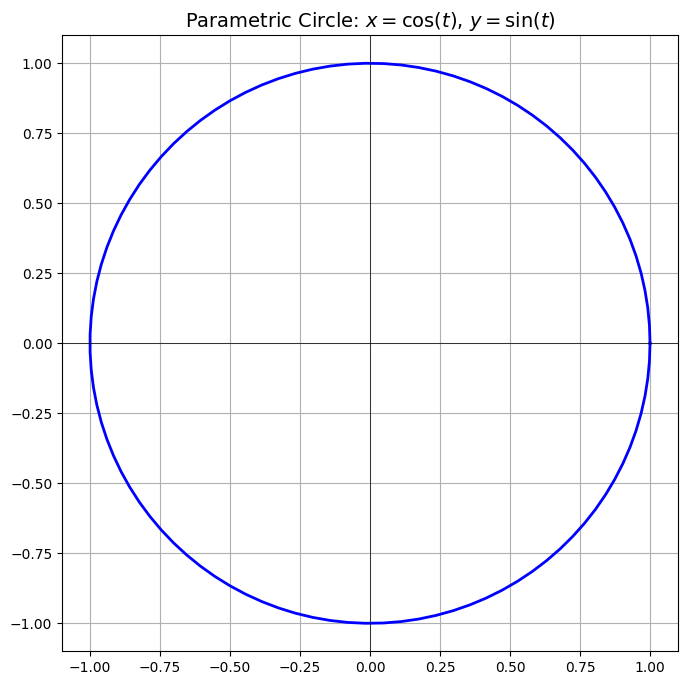

In [10]:
# Parametric circle
t = sp.Symbol('t')
xt = sp.cos(t)
yt = sp.sin(t)

fig, ax = plt.subplots(figsize=(8, 8))
fplot(xt, yt, range=(0, 2*np.pi), ax=ax, color='blue', linewidth=2)
ax.set_aspect('equal')
ax.set_title('Parametric Circle: $x=\\cos(t)$, $y=\\sin(t)$', fontsize=14)
ax.grid(True)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
plt.show()

### Example 10: Spiral

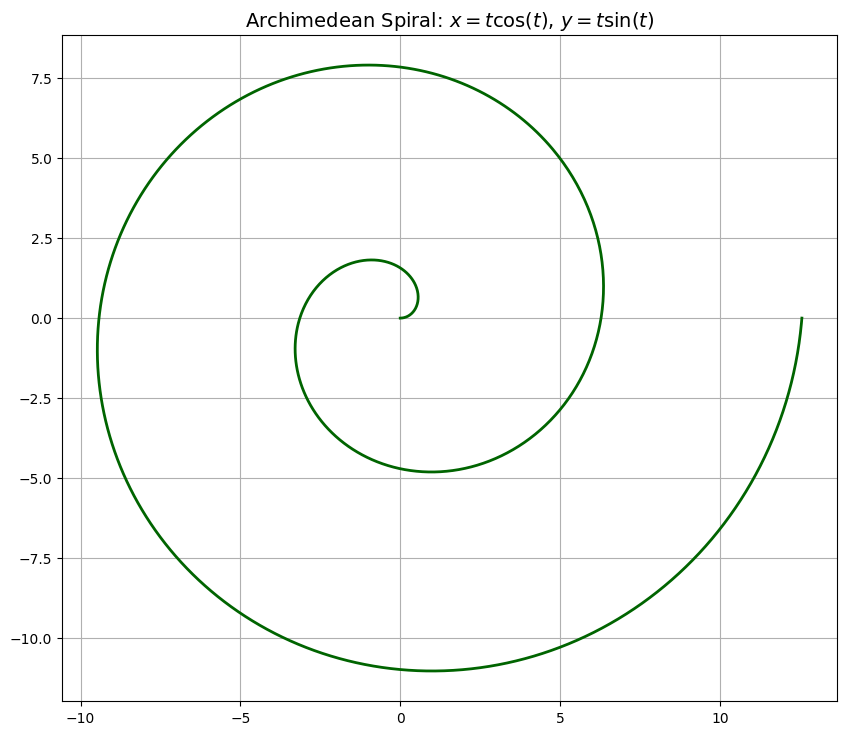

In [11]:
# Archimedean spiral
xt = t * sp.cos(t)
yt = t * sp.sin(t)

fig, ax = plt.subplots(figsize=(10, 10))
fplot(xt, yt, range=(0, 4*np.pi), ax=ax, color='darkgreen', linewidth=2, npoints=1000)
ax.set_aspect('equal')
ax.set_title('Archimedean Spiral: $x=t\\cos(t)$, $y=t\\sin(t)$', fontsize=14)
ax.grid(True)
plt.show()

### Example 11: Lissajous Curve

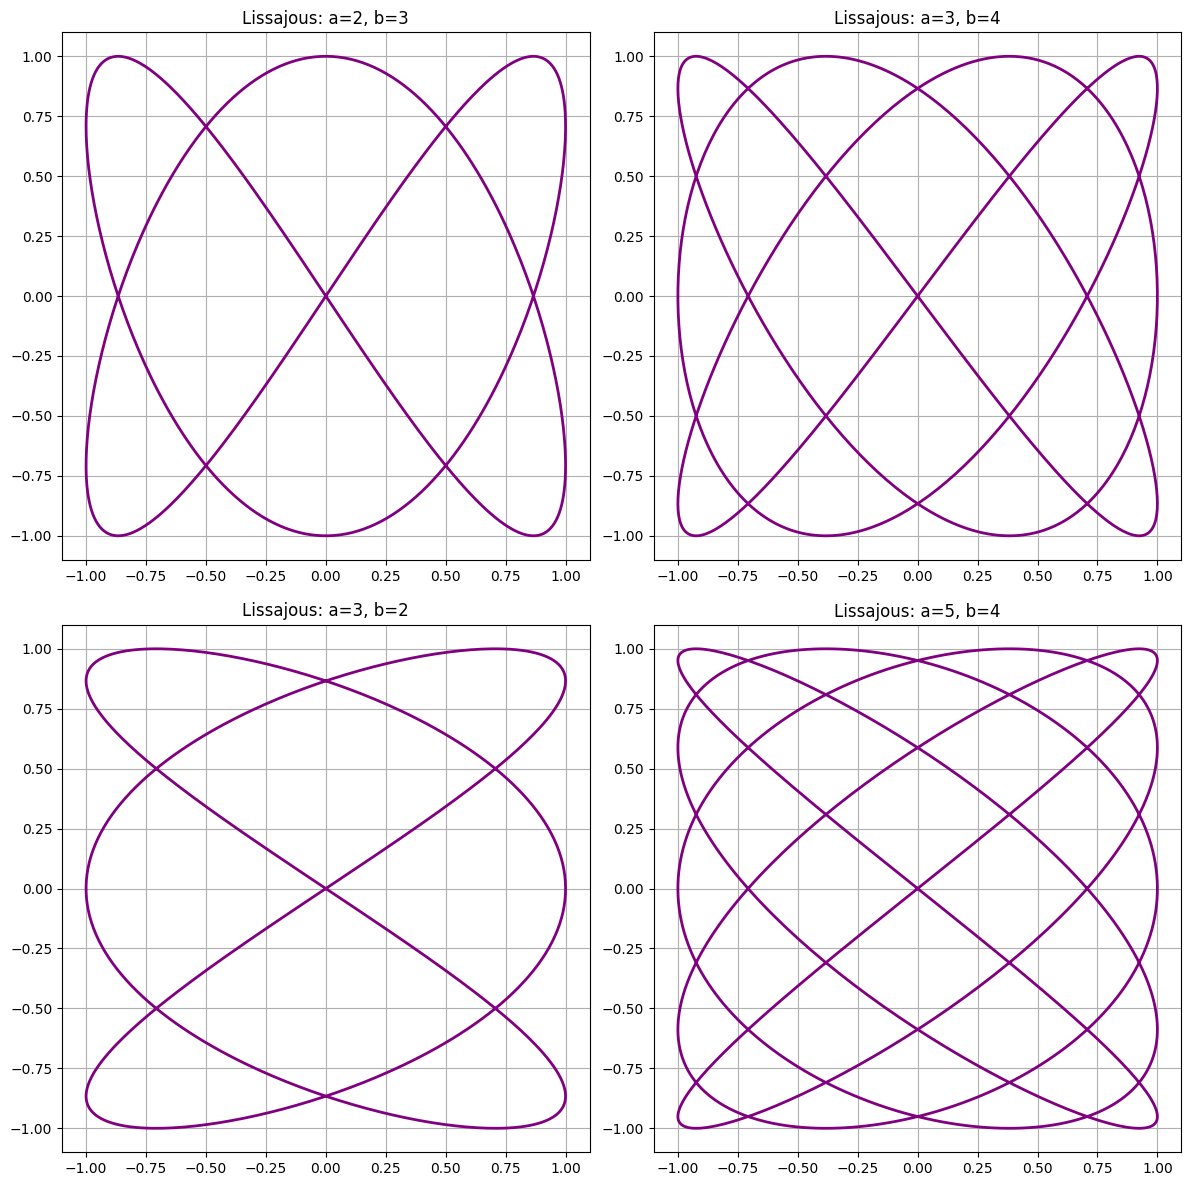

In [12]:
# Lissajous curve with different frequency ratios
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

params = [(2, 3), (3, 4), (3, 2), (5, 4)]

for idx, (a, b) in enumerate(params):
    ax = axes[idx // 2, idx % 2]
    xt = sp.sin(a * t)
    yt = sp.sin(b * t)
    fplot(xt, yt, range=(0, 2*np.pi), ax=ax, color='purple', linewidth=2, npoints=1000)
    ax.set_aspect('equal')
    ax.set_title(f'Lissajous: a={a}, b={b}', fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Example 12: Rose Curve

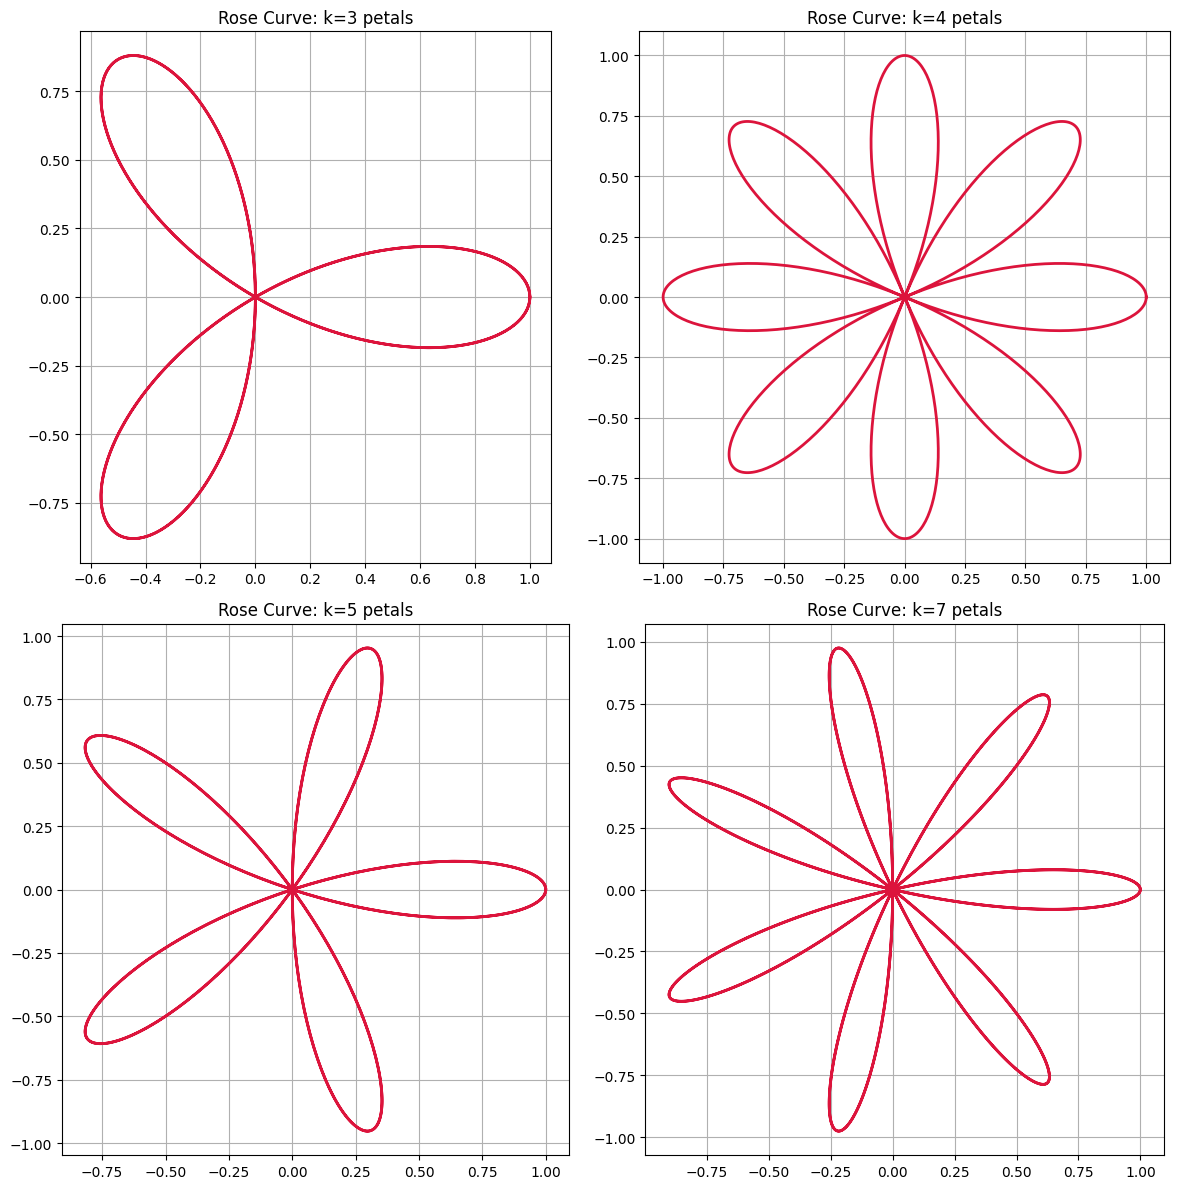

In [13]:
# Rose curves with different petal numbers
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

k_values = [3, 4, 5, 7]

for idx, k in enumerate(k_values):
    ax = axes[idx // 2, idx % 2]
    xt = sp.cos(k*t) * sp.cos(t)
    yt = sp.cos(k*t) * sp.sin(t)
    fplot(xt, yt, range=(0, 2*np.pi), ax=ax, color='crimson', linewidth=2, npoints=1000)
    ax.set_aspect('equal')
    ax.set_title(f'Rose Curve: k={k} petals', fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Example 13: Cycloid

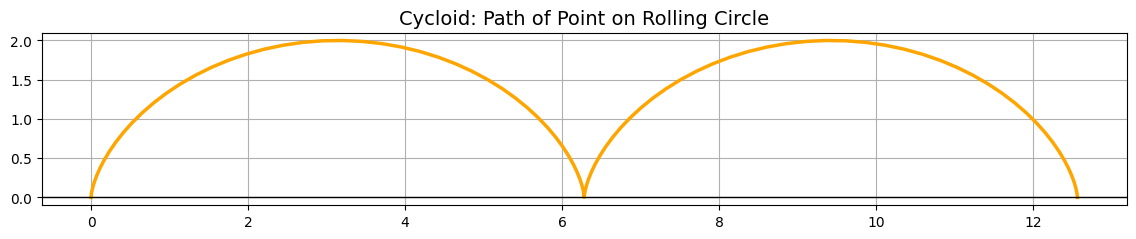

In [14]:
# Cycloid - path traced by point on circle rolling along a line
r = 1  # radius
xt = r * (t - sp.sin(t))
yt = r * (1 - sp.cos(t))

fig, ax = plt.subplots(figsize=(14, 6))
fplot(xt, yt, range=(0, 4*np.pi), ax=ax, color='orange', linewidth=2.5)
ax.set_title('Cycloid: Path of Point on Rolling Circle', fontsize=14)
ax.grid(True)
ax.axhline(y=0, color='k', linewidth=1)
ax.set_aspect('equal')
plt.show()

## Advanced Examples

### Example 14: Explicit Parameter with Different Variable Names

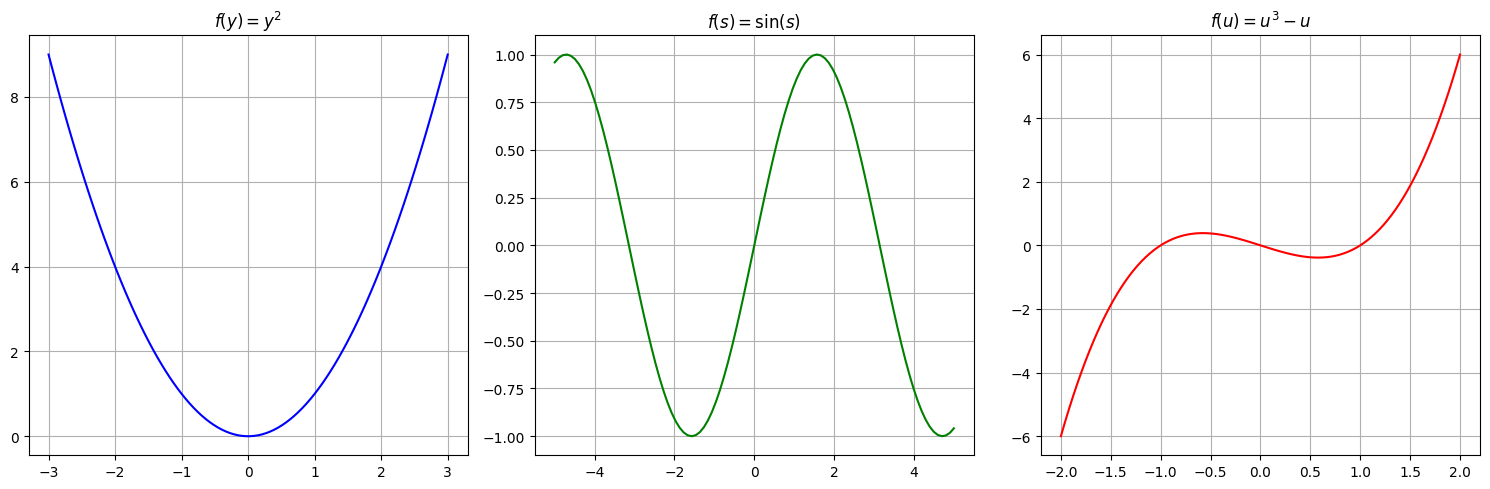

In [15]:
# Using different variable names
y = sp.Symbol('y')
s = sp.Symbol('s')
u = sp.Symbol('u')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Different parameters with explicit specification
fplot(y**2, y, range=(-3, 3), ax=axes[0], color='blue')
axes[0].set_title('$f(y) = y^2$')
axes[0].grid(True)

fplot(sp.sin(s), s, range=(-5, 5), ax=axes[1], color='green')
axes[1].set_title('$f(s) = \\sin(s)$')
axes[1].grid(True)

fplot(u**3 - u, u, range=(-2, 2), ax=axes[2], color='red')
axes[2].set_title('$f(u) = u^3 - u$')
axes[2].grid(True)

plt.tight_layout()
plt.show()

### Example 15: Combining Regular and Parametric Plots

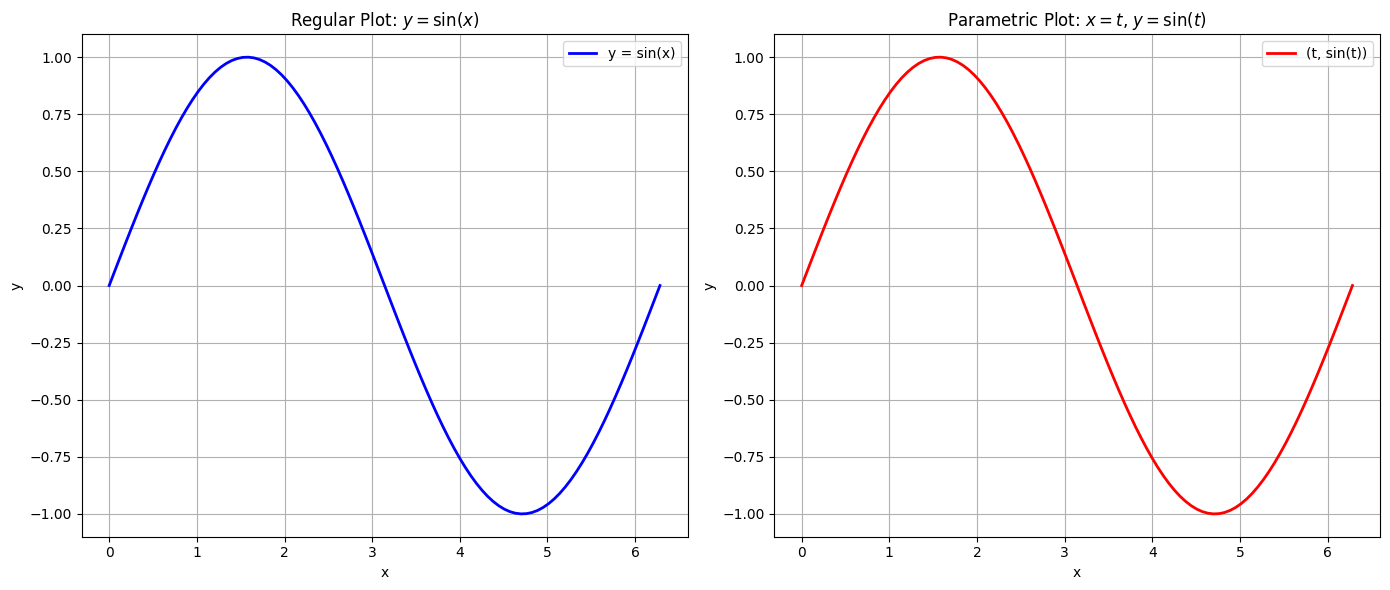

In [16]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Regular plot
fplot(sp.sin(x), range=(0, 2*np.pi), ax=ax1, color='blue', linewidth=2, label='y = sin(x)')
ax1.set_title('Regular Plot: $y = \\sin(x)$', fontsize=12)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)
ax1.legend()

# Right: Parametric plot (same function)
fplot(t, sp.sin(t), range=(0, 2*np.pi), ax=ax2, color='red', linewidth=2, label='(t, sin(t))')
ax2.set_title('Parametric Plot: $x=t$, $y=\\sin(t)$', fontsize=12)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

### Example 16: High Frequency Functions

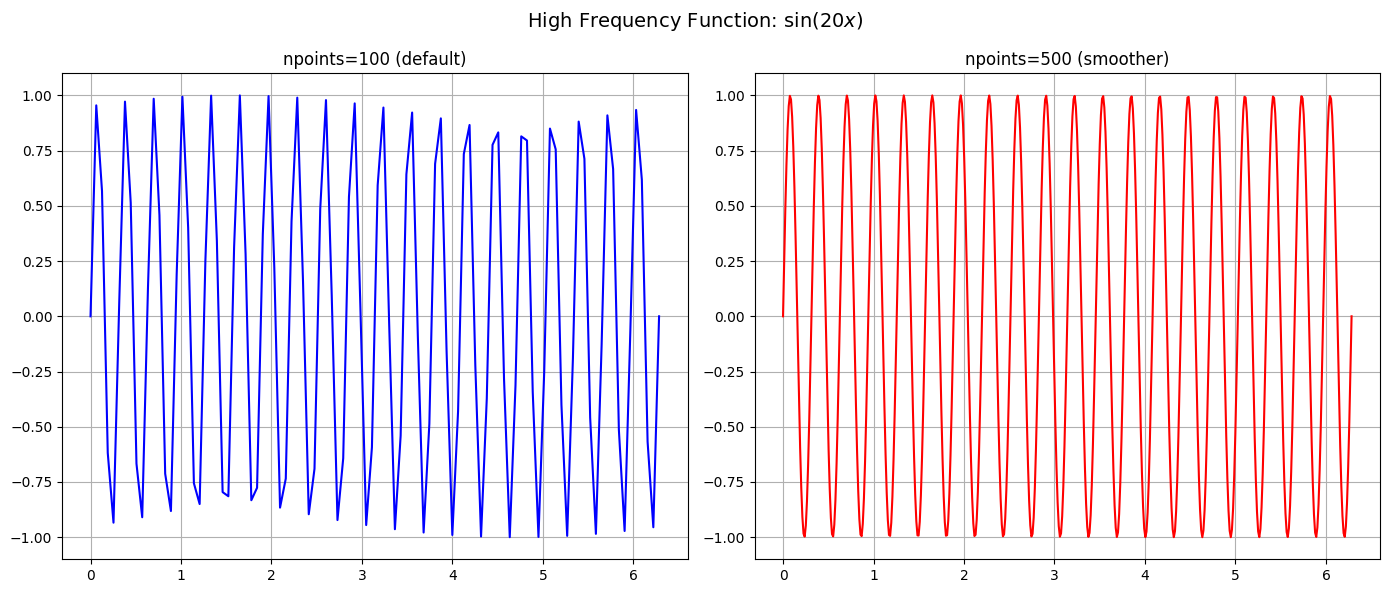

In [17]:
# High frequency function - use more points for smooth curve
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# With default npoints (100)
fplot(sp.sin(20*x), range=(0, 2*np.pi), ax=axes[0], color='blue', npoints=100)
axes[0].set_title('npoints=100 (default)', fontsize=12)
axes[0].grid(True)

# With more points (500)
fplot(sp.sin(20*x), range=(0, 2*np.pi), ax=axes[1], color='red', npoints=500)
axes[1].set_title('npoints=500 (smoother)', fontsize=12)
axes[1].grid(True)

plt.suptitle('High Frequency Function: $\\sin(20x)$', fontsize=14)
plt.tight_layout()
plt.show()

### Example 17: Damped Oscillation

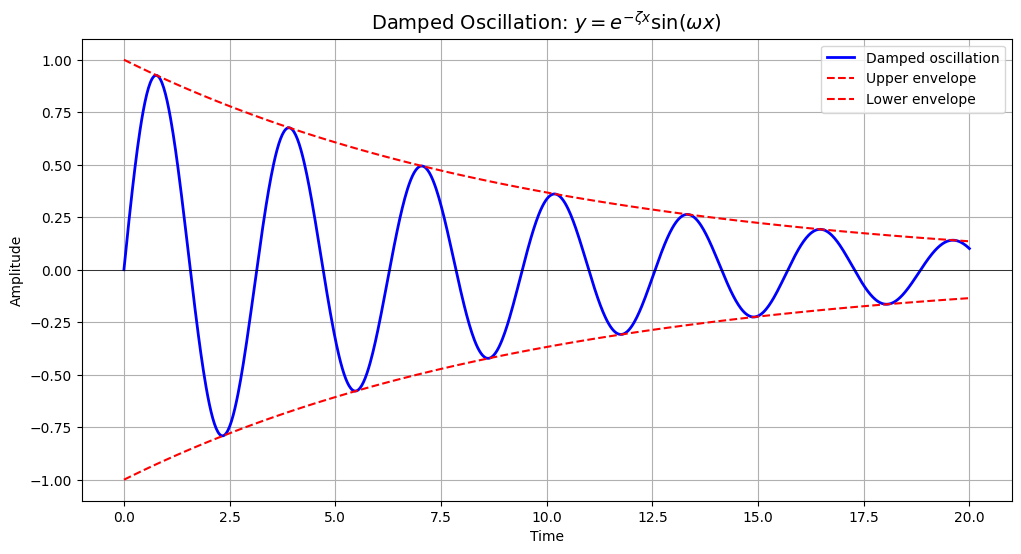

In [18]:
# Damped sine wave (common in physics/engineering)
omega = 2  # frequency
zeta = 0.1  # damping ratio

fig, ax = plt.subplots(figsize=(12, 6))

# Damped oscillation
fplot(sp.exp(-zeta*x) * sp.sin(omega*x), range=(0, 20), ax=ax, npoints=1000,
      color='blue', linewidth=2, label='Damped oscillation')

# Envelope
fplot(sp.exp(-zeta*x), range=(0, 20), ax=ax,
      color='red', linestyle='--', label='Upper envelope')
fplot(-sp.exp(-zeta*x), range=(0, 20), ax=ax,
      color='red', linestyle='--', label='Lower envelope')

ax.set_title('Damped Oscillation: $y = e^{-\\zeta x} \\sin(\\omega x)$', fontsize=14)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
ax.axhline(y=0, color='k', linewidth=0.5)
plt.show()

## Summary

The `fplot()` function provides a convenient MATLAB-like interface for plotting symbolic functions:

### Key Features:
- **Automatic parameter detection**: No need to specify the variable if there's only one
- **Default range**: [-5, 5] can be easily customized with `range=(a, b)`
- **Parametric curves**: Pass two expressions for x(t) and y(t)
- **Matplotlib integration**: All standard matplotlib styling options work
- **High-resolution plotting**: Adjust `npoints` for smoother curves

### Usage Patterns:
```python
# Basic usage
fplot(f)                           # Auto-detect parameter, default range
fplot(f, range=(a, b))             # Custom range
fplot(f, param)                    # Explicit parameter
fplot(f, param, range=(a, b))      # Both explicit

# Parametric
fplot(xt, yt)                      # Auto-detect parameter
fplot(xt, yt, range=(a, b))        # Custom range
fplot(xt, yt, param)               # Explicit parameter
fplot(xt, yt, param, range=(a, b)) # Both explicit

# Styling
fplot(f, ax=ax, color='red', linewidth=2, linestyle='--', label='f(x)')
```

### When to Use:
- Quickly visualizing mathematical functions
- Comparing symbolic expressions
- Creating parametric curves
- Educational demonstrations
- Engineering analysis (transfer functions, responses, etc.)

In [19]:
fplot?

Signature: fplot(*args, range=(-5, 5), ax=None, npoints=100, **kwargs)
Docstring:
Plot symbolic function(s) over a range, similar to MATLAB's fplot.

This function automatically detects the independent variable from the
symbolic expression and creates a plot. It supports both regular 2D
plots and parametric curves.

Parameters
----------
*args : sympy expression(s) or tuple
    Positional arguments specifying what to plot:

    For 2D plots:
        - fplot(f): Plot f(x) with auto-detected parameter, default range
        - fplot(f, param): Plot f with explicit parameter

    For parametric plots:
        - fplot(xt, yt): Plot parametric curve with auto-detected parameter
        - fplot(xt, yt, param): Plot parametric curve with explicit parameter

range : tuple of (float, float), optional
    Range [start, end] for the independent variable.
    Default: (-5, 5)

ax : matplotlib.axes.Axes, optional
    Axes to plot on. If None, uses plt.gca() to get current axes.

npoints : int, optio